# Edge detection

## 2.1 Sobel edge detector

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

### 1. Effect of sharpening on edge detection

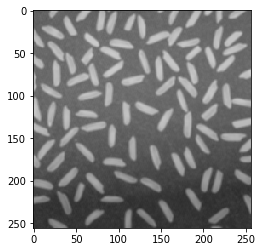

In [2]:
rice = cv2.imread('./rice.png')
plt.imshow(rice)

#### Apply a Sobel edge detector to the image 'rice'. Use following thresholds: 150 and 200. Use kernel size of 3.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Threshold 200'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

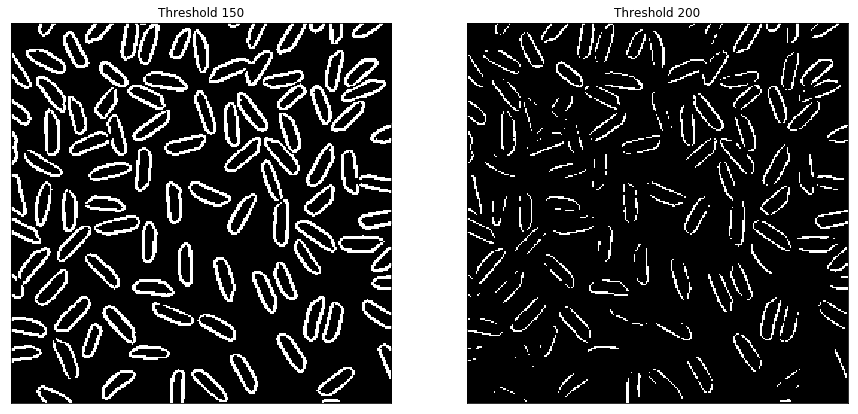

In [18]:
# Compute the x, y gradients
rice_sobel_x = cv2.Sobel(rice, cv2.CV_64F, 1, 0, ksize=3)
rice_sobel_y = cv2.Sobel(rice, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude
rice_sobel_magnitude = cv2.magnitude(rice_sobel_x, rice_sobel_y)

# Apply thresholds
_, rice_threshold150 = cv2.threshold(rice_sobel_magnitude, 150, 255, cv2.THRESH_TOZERO)
_, rice_threshold200 = cv2.threshold(rice_sobel_magnitude, 200, 255, cv2.THRESH_TOZERO)

# plot
plt.figure(figsize=(15, 15))
plt.subplot(121), plt.imshow(rice_threshold150)
plt.title("Threshold 150"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(rice_threshold200)
plt.title("Threshold 200"), plt.xticks([]), plt.yticks([])

#### Apply a Sobel edge detector to the two previously-sharpened images with the same threshold.

In [10]:
# ===== code from sharpening.ipynb for sharpened images ===== #

filter_size = 5
variance = 2

# Gaussian Filter
blurred_gaussian_rice = cv2.GaussianBlur(rice, (filter_size, filter_size), math.sqrt(variance))
gaussian_detail = rice - blurred_gaussian_rice
sharpened_gaussian_rice = rice + gaussian_detail

# Box Filter
box_filter = np.ones((filter_size, filter_size), np.float32)/(filter_size * filter_size)
blurred_box_rice = cv2.filter2D(rice, -1, box_filter)
box_detail = rice - blurred_box_rice
sharpened_box_rice = rice + box_detail

# ===== end - code from sharpening.ipynb for sharpened images =====#

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Sharpened Box - 200'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

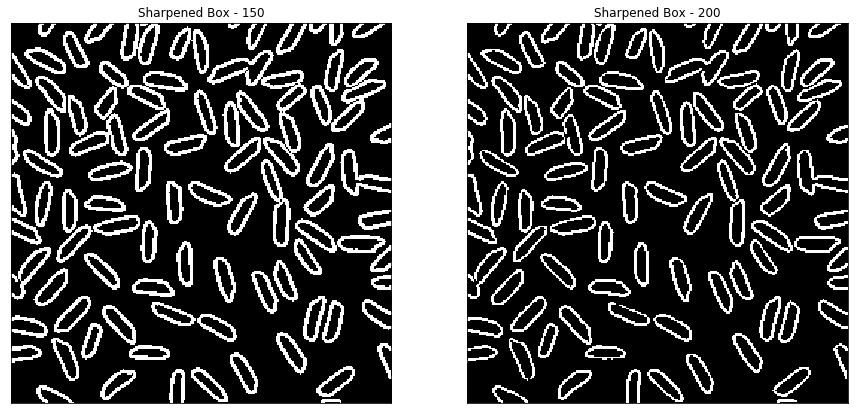

In [19]:
# Compute the x, y gradients
box_rice_sobel_x = cv2.Sobel(sharpened_box_rice, cv2.CV_64F, 1, 0, ksize=3)
box_rice_sobel_y = cv2.Sobel(sharpened_box_rice, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude
box_rice_sobel_magnitude = cv2.magnitude(box_rice_sobel_x, box_rice_sobel_y)

# Apply thresholds
_, box_rice_sobel_threshold150 = cv2.threshold(box_rice_sobel_magnitude, 150, 150, cv2.THRESH_TOZERO)
_, box_rice_sobel_threshold200 = cv2.threshold(box_rice_sobel_magnitude, 200, 200, cv2.THRESH_TOZERO)

# plot
plt.figure(figsize=(15, 15))
plt.subplot(121), plt.imshow(box_rice_sobel_threshold150)
plt.title("Sharpened Box - 150"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(box_rice_sobel_threshold200)
plt.title("Sharpened Box - 200"), plt.xticks([]), plt.yticks([])

#### Comment on the effectiveness of using sharpening prior to the edge detection.

Sharpening images increases the difference of the pixels at edges, which increases the gradients at those pixels. Therefore, this helps with the edge detection process. The thresholding will eliminate less of the edge pixels. This is especially noticeable with the 200 threshold. 

### 2. Effect of denoising on edge detection

#### Apply a Sobel edge detector to the image 'woman'. Use two values of thresholds: 10% and 20% of the maximum filter response.

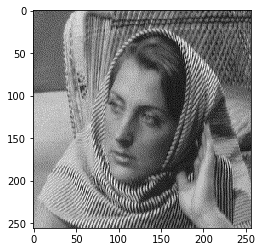

In [28]:
woman = cv2.imread('woman.png')
plt.imshow(woman)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, '20% Thres'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

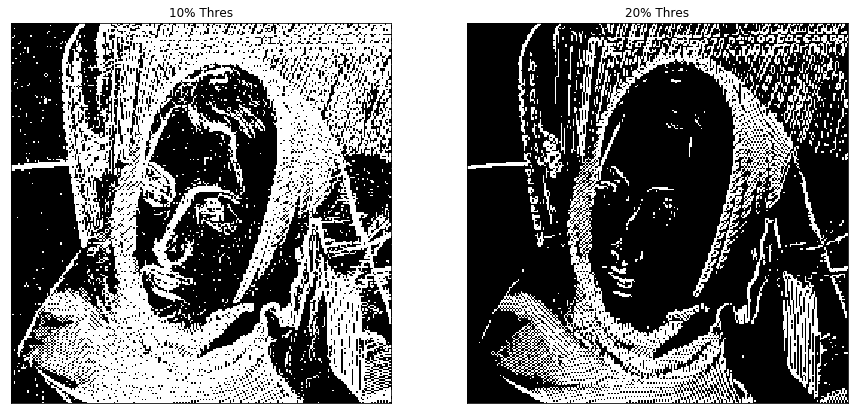

In [32]:
# Compute the x, y gradients
woman_sobel_x = cv2.Sobel(woman, cv2.CV_64F, 1, 0, ksize=3)
woman_sobel_y = cv2.Sobel(woman, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude
woman_magnitude = cv2.magnitude(woman_sobel_x, woman_sobel_y)


# Apply threshold
max_val = np.max(woman_magnitude)

_, woman_threshold10 = cv2.threshold(woman_magnitude, max_val*0.1, 255, cv2.THRESH_TOZERO)
_, woman_threshold20 = cv2.threshold(woman_magnitude, max_val*0.2, 255, cv2.THRESH_TOZERO)

# plot
plt.figure(figsize=(15, 15))
plt.subplot(121), plt.imshow(woman_threshold10)
plt.title("10% Thres"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(woman_threshold20)
plt.title("20% Thres"), plt.xticks([]), plt.yticks([])

#### First denoise image with a 3 x 3 box filter and then apply a Sobel edge detector. Use the same values of threshold.

In [30]:
# Denoise the image 
filter_size = 3
kernel = np.ones((filter_size, filter_size), np.float32)/(filter_size*filter_size)
box_woman = cv2.filter2D(woman, -1, kernel)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Denoised 20% Thres'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

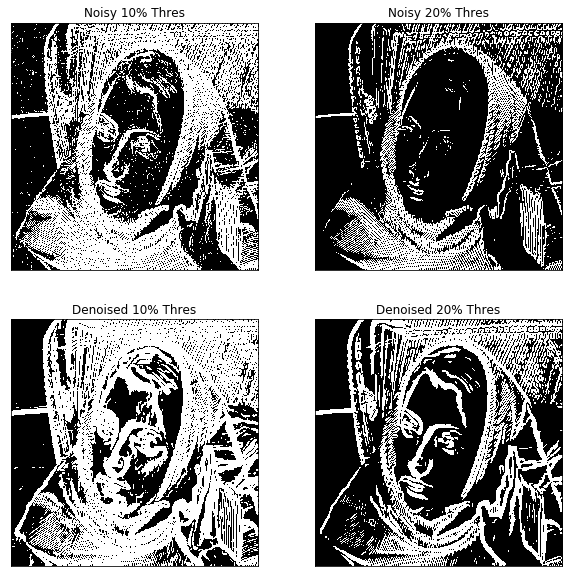

In [33]:
# Compute the x, y gradients
box_woman_sobel_x = cv2.Sobel(box_woman, cv2.CV_64F, 1, 0, ksize=3)
box_woman_sobel_y = cv2.Sobel(box_woman, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude
box_woman_magnitude = cv2.magnitude(box_woman_sobel_x, box_woman_sobel_y)

# Apply threshold
max_val = np.max(box_woman_magnitude)

_, box_woman_threshold10 = cv2.threshold(box_woman_magnitude, max_val*0.1, 255, cv2.THRESH_TOZERO)
_, box_woman_threshold20 = cv2.threshold(box_woman_magnitude, max_val*0.2, 255, cv2.THRESH_TOZERO)

# plot
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(woman_threshold10)
plt.title("Noisy 10% Thres"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(woman_threshold20)
plt.title("Noisy 20% Thres"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(box_woman_threshold10)
plt.title("Denoised 10% Thres"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(box_woman_threshold20)
plt.title("Denoised 20% Thres"), plt.xticks([]), plt.yticks([])

#### Comment on the effectiveness of using denoising prior to edge detection.

Noise can cause drastic change in pixel values in non-edge areas, which causes false-positives in edge detection. This can be observed in the 'Noise 10% Threshold' image where there are a lot of granulated edges. After denoising, the result of edge detection seem cleaner. 
However, it seems like in the denoised case, too much edge is detected. This is because the smoothing causes all gradient values decrease. Therefore, the threashold values decrease as well. 